In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

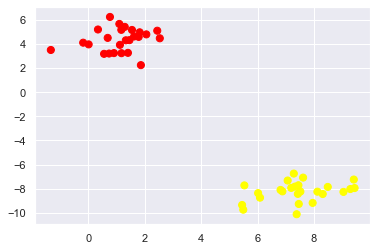

In [19]:
# Linear SVM
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std = 1)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
# make_blobs
# https://datascienceschool.net/view-notebook/ec26c797cec646e295d737c522733b15/

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10) # hard margin (no error) svm
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """ Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

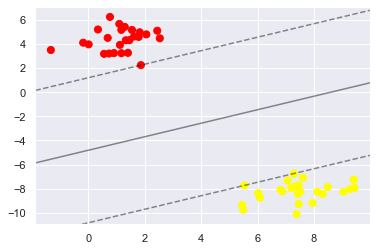

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [23]:
model.support_vectors_

array([[ 1.86799067,  2.23785538],
       [ 7.28356926, -6.73760607],
       [ 5.53291614, -7.71572239]])

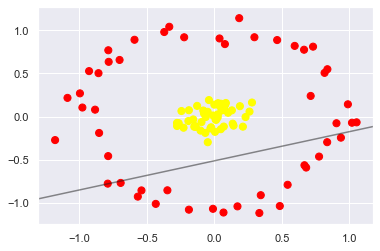

In [24]:
# Kernel SVM
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [25]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

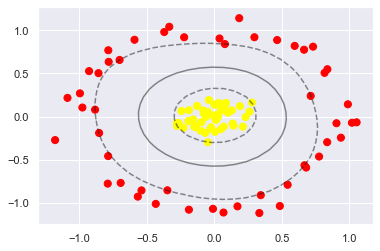

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

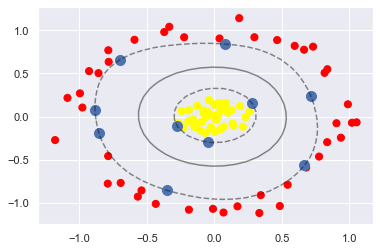

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, lw=1)

In [28]:
# HW1

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [30]:
# import some data to play with
iris = datasets.load_iris()
iris
# iris data는 4가지 특성으로 꽃의 종류를 분류하는 dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
X = iris.data[:, :2] 
# we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
# 꽃받침 길이, 꽃받침 너비
y = iris.target
print(X)
print(y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [32]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc_linear = svm.SVC(kernel='linear', C=1,gamma=0.01, random_state=0).fit(X, y)

In [33]:
# SVC 클래스의 하이퍼 파라메터 gamma
# SVM 알고리즘을 사용하여 각 영역을 구분할 때
# 마진의 크기를 결정하는 하이퍼 파라메터
# gamma 의 값이 작을수록 큰 마진의 값을 찾음
# (학습데이터에 과적합된 경우 일반화 성능을 높이기 위해서 사용)
# gamma 의 값이 커질수록 작은 마진의 값을 찾음
# (학습데이터에 대한 성능을 높이기 위해서 사용)
# auto 로 지정하는 경우 1 / n_features
# scale 로 지정하는 경우 1 / (n_features * X.std()) 
# - 스케일이 조정되지 않은 특성에서 좋은 결과를 반환
# - 특성 데이터를 전처리한 경우 scale과 auto는 동일함
# - 기본값은 auto
# gamma가 클수록 영역이 data 주변에 동글동글 모여있게 됨

In [34]:
# SVC 클래스의 하이퍼 파라메터 C
# 모델의 학습에 제약을 설정하기 위한 파라메터
# C클수록 margin이 softer해짐
## C의 값이 낮을 수록 강한 제약이 설정됨
## (모델이 과적합된 경우 일반화 성능을 높이기 위해서 사용)
## C의 값이 높을 수록 약한 제약이 설정됨
## (모델이 과소적합된 경우 학습 성능을 높이기 위해서 사용)

In [35]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100 # -> 100개의 점 or 간격으로 표현하기 위함인듯?
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# meshgrid는 2차원 data로 표현할 때 그리드 포인트를 만드는 과정을 도와준다
# 가로축과 세로축 점을 나타내는 두벡터를 인수로 받아서 사각형 영역을 이루는 조합을 출력
# xx와 yy의 shape은 같아짐
print(xx.shape, yy.shape)

(164, 208) (164, 208)


In [36]:
np.c_[xx.ravel(), yy.ravel()]

array([[3.3       , 1.        ],
       [3.3269697 , 1.        ],
       [3.35393939, 1.        ],
       ...,
       [8.82878788, 5.39606061],
       [8.85575758, 5.39606061],
       [8.88272727, 5.39606061]])

In [37]:
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z.shape

(34112,)

In [38]:
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

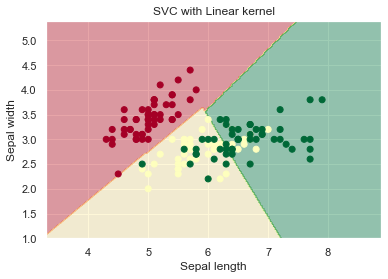

In [39]:
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Linear kernel')
plt.show()

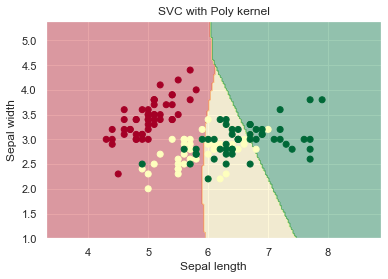

In [40]:
# poly kernel
svc_poly = svm.SVC(kernel='poly', C=1,gamma=0.01).fit(X, y)
Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Poly kernel')
plt.show()

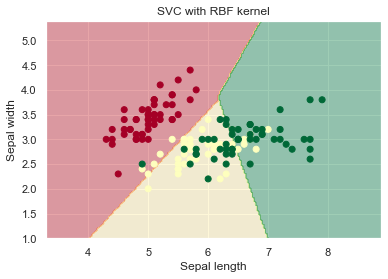

In [41]:
# rbf kernel
svc_rbf = svm.SVC(kernel='rbf', C=1,gamma=0.01).fit(X, y)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')
plt.show()

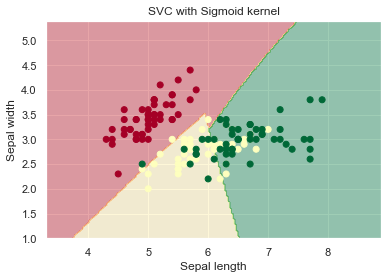

In [42]:
# sigmoid kernel
svc_sigmoid = svm.SVC(kernel='sigmoid', C=1,gamma=0.01).fit(X, y)
Z = svc_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Sigmoid kernel')
plt.show()

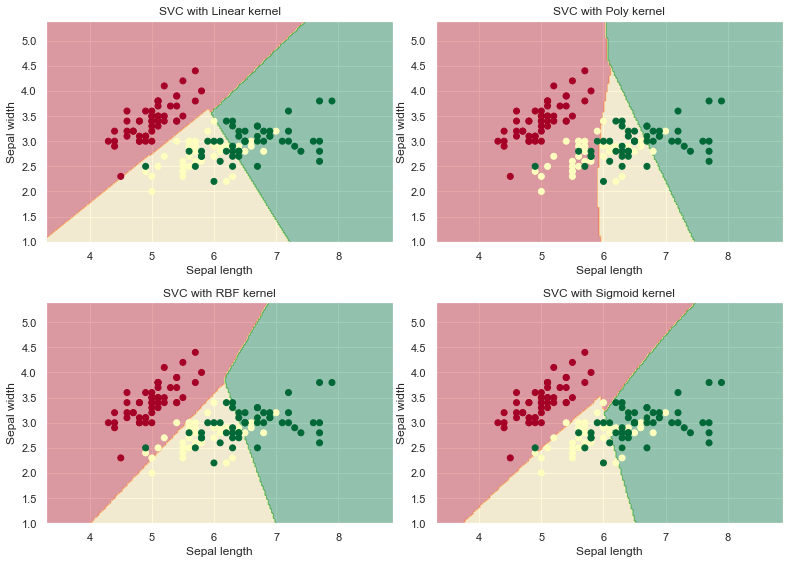

In [43]:
plt.figure(figsize=(11,8))

plt.subplot(221)
svc_linear = svm.SVC(kernel='linear', C=1,gamma=0.01).fit(X, y)
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Linear kernel')

plt.subplot(222)
svc_poly = svm.SVC(kernel='poly', C=1,gamma=0.01).fit(X, y)
Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Poly kernel')

plt.subplot(223)
svc_rbf = svm.SVC(kernel='rbf', C=1,gamma=0.01).fit(X, y)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')

plt.subplot(224)
svc_sigmoid = svm.SVC(kernel='sigmoid', C=1,gamma=0.01).fit(X, y)
Z = svc_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Sigmoid kernel')

plt.tight_layout()
plt.show()
# Linear가 가장 좋은 듯

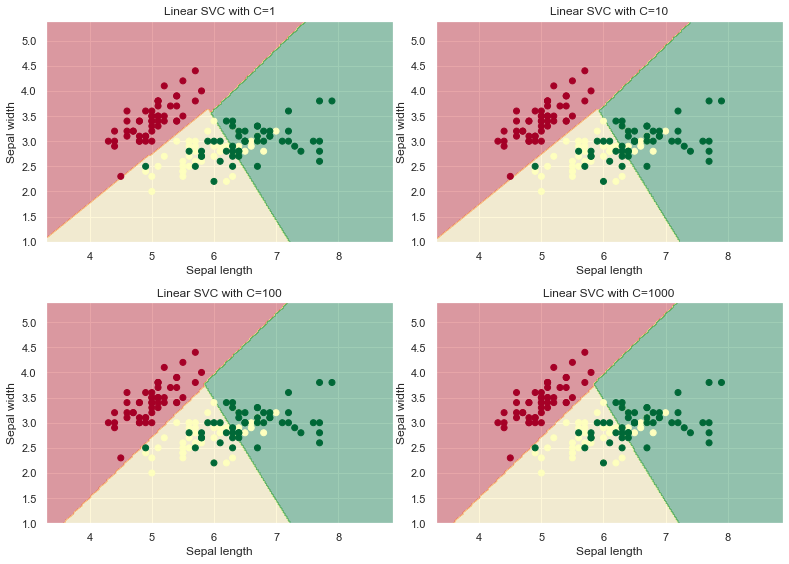

In [44]:
# C 변화
plt.figure(figsize=(11,8))

plt.subplot(221)
svc_linear = svm.SVC(kernel='linear', C=1,gamma=0.01).fit(X, y)
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Linear SVC with C=1')

plt.subplot(222)
svc_linear = svm.SVC(kernel='linear', C=10,gamma=0.01).fit(X, y)
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Linear SVC with C=10')

plt.subplot(223)
svc_linear = svm.SVC(kernel='linear', C=100,gamma=0.01).fit(X, y)
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Linear SVC with C=100')

plt.subplot(224)
svc_linear = svm.SVC(kernel='linear', C=1000,gamma=0.01).fit(X, y)
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Linear SVC with C=1000')

plt.tight_layout()
plt.show()

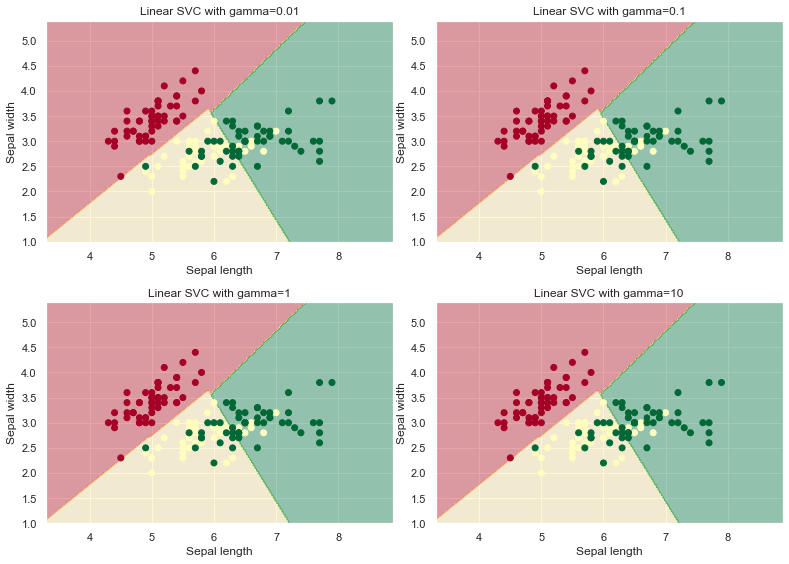

In [45]:
# gamma 변화
plt.figure(figsize=(11,8))

plt.subplot(221)
svc_linear = svm.SVC(kernel='linear', C=1,gamma=0.01).fit(X, y)
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Linear SVC with gamma=0.01')

plt.subplot(222)
svc_linear = svm.SVC(kernel='linear', C=1,gamma=0.1).fit(X, y)
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Linear SVC with gamma=0.1')

plt.subplot(223)
svc_linear = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, y)
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Linear SVC with gamma=1')

plt.subplot(224)
svc_linear = svm.SVC(kernel='linear', C=1,gamma=10).fit(X, y)
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Linear SVC with gamma=10')

plt.tight_layout()
plt.show()

In [29]:
# HW2 : weighted SVM(cost-sensitive SVM) for imbalanced classification
# modification of SVM that weighs the margin proportional to the class importance
# 비대칭 margin,

In [52]:
# 1) Imbalanced Classification Dataset
from sklearn.datasets import make_classification
from collections import Counter
from numpy import where
import matplotlib.pyplot as plt

In [53]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


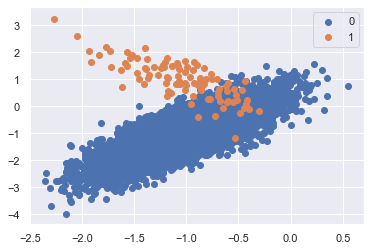

In [54]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [56]:
# 2) standard SVM
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# define model
model = SVC(gamma='scale')

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
## 10개로 나눈 KFold를 3번 반복
## stratify -> y비율 맞춰줌

# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))
## 교차검증의 평균값을 통해 모델의 정확도가 대략 80.8%일 것으로 기대

[0.7640404  1.         0.66050505 0.62       0.9030303  0.91656566
 0.84707071 0.71262626 0.82686869 0.82424242 0.91939394 0.82242424
 0.87313131 0.62727273 0.90484848 0.61515152 0.90121212 0.99989899
 0.71383838 0.72575758 0.73323232 0.84545455 0.43555556 0.80515152
 0.80616162 0.96242424 0.85464646 0.81171717 0.85939394 0.94717172]
Mean ROC AUC: 0.808


In [ ]:
# 3) Weighted SVM
# The C parameter is used as a penalty during the fit of the model, specifically the finding of the decision boundary. 
# By default, each class has the same weighting, which means that the softness of the margin is symmetrical.
# Given that there are significantly more examples in the majority class than the minority class, 
# it means that the soft margin and, in turn, the decision boundary will favor the majority class.
# majority로 판단하는 것이 classificaion error를 줄일 것
# imbalance ratio가 클수록 ignoring theminority class will lead to better optimization results
# Perhaps the simplest and most common extension to SVM for imbalanced classification is to weight the C value in proportion to the importance of each class
# minority -> larger weight (softer margin, higher misclassification cost)
# majority -> small weight (harder margin)
# C통해 skew 보완

In [57]:
# define model
weights = {0:1.0, 1:100.0}
model = SVC(gamma='scale', class_weight=weights)

# define model
weights = {0:0.01, 1:1.0}
model = SVC(gamma='scale', class_weight=weights)

In [58]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# define model
model = SVC(gamma='scale', class_weight='balanced')

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

# heuristic : using a class weighting that is the inverse ratio of the training data
# class_weight='balanced'로 하면 자동으로 맞춰줌
# scores 평균 증가

Mean ROC AUC: 0.967


In [ ]:
# 4) Grid Search Weighted SVM
# GridSearchCV는 복수개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾아줌

In [59]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# define model
model = SVC(gamma='scale')

# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# execute the grid search
grid_result = grid.fit(X, y)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.967747 using {'class_weight': {0: 1, 1: 100}}
0.742960 (0.149857) with: {'class_weight': {0: 100, 1: 1}}
0.748404 (0.149873) with: {'class_weight': {0: 10, 1: 1}}
0.807960 (0.126354) with: {'class_weight': {0: 1, 1: 1}}
0.934401 (0.065202) with: {'class_weight': {0: 1, 1: 10}}
0.967747 (0.038637) with: {'class_weight': {0: 1, 1: 100}}


In [ ]:
# classification_report -> Accuracy, F1 score
# ROC curve
# https://nittaku.tistory.com/297